In [71]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Image, display, clear_output
import pandas as pd

<h1>DER Choose Your Own Adventure</h1>
    <p><i>An EPRI TI prototype notebook which allows the user to input DER project data and relevant distribution system data and provide guidance according to EPRI reports on screening practices, Reference Point of Applicability (RPA) and associated recommended commissioning tests, and general configuration layout.</i> </p>
<body>
    <h2>Task 1: Identify RPA</h2>
        <h3>Input</h3>
            <hl>DER Characteristics</hl>
            <ul>
    <li>Aggregate DER Nameplate Rating</li>
<li>Single-Phase / Three-Phase DER</li>
            </ul>
    <hl>System Characteristics</hl>
        <ul>
            <li>Single-Phase / Three-Phase Electric Service</li> 
            <li>Annual Average Load Demand behind PCC</li>
            <li>Transformer Winding Connection Utility Side</li>
    </ul>
        <h3>Output:</h3>
        <ol>
            <li>RPA</li>
            <li>Zero Sequence Continuity (Y/N)</li>
        </ol>
</body>

<h2>Step 1: Submit DER Rating</h2>
<p>Input DER Rating in kW. Value between 0 and 10000</p>

In [35]:
DER_rating = widgets.BoundedFloatText(
    value=50.0,
    min=0.0,
    max=10000.0,
    step=1,
    description='DER Rating (kW):',
    style={'description_width' : 'initial'},
    disabled=False
)

display(DER_rating)
print(DER_rating.value)

BoundedFloatText(value=50.0, description='DER Rating (kW):', max=10000.0, step=1.0, style=DescriptionStyle(des…

50.0


<h2>Step 2: Identify DER Phasing & Wiring Configuration</h2>

In [97]:
DER_phase = widgets.RadioButtons(
    options=['Single Phase', 'Three Phase'],
    value='Three Phase',
    description='Select DER Phasing:',
    disabled=False
)

DER_winding = widgets.RadioButtons(
    options=['Delta', 'Y', 'Yg', 'Y (effectively grounded)'],
    #value='Yg',
    description='Select DER Transformer Configuration:',
    disabled=False
)

display(DER_phase)

RadioButtons(description='Select DER Phasing:', index=1, options=('Single Phase', 'Three Phase'), value='Three…

In [32]:
#disable DER winding button for single phase DER
if DER_phase.value == 'Three Phase':
    DER_winding.disabled = False
else:
    DER_winding.disabled = True
display(DER_winding)

RadioButtons(description='Select DER Transformer Configuration:', disabled=True, options=('Delta', 'Y', 'Yg', …

<h2>Step 3: Collect System Data</h2>
<ol>
    <li>Electric Service Phasing</li>
    <li>Utility Side Transformer Configuration</li>    
</ol>

In [98]:
SYS_phase = widgets.RadioButtons(
    options=['Single Phase', 'Three Phase'],
    value='Three Phase',
    description='Select Electric Service PCC Phasing:',
    disabled=False
)

SYS_winding = widgets.RadioButtons(
    options=['Delta', 'Y', 'Yg', 'Y (effectively grounded)'],
    value='Yg',
    description='Select Utility Side Transformer Configuration:',
    disabled=False
)

display(SYS_phase)
print(SYS_phase.value)

RadioButtons(description='Select Electric Service PCC Phasing:', index=1, options=('Single Phase', 'Three Phas…

Three Phase


In [6]:
if str(SYS_phase.value) == 'Three Phase':
    display(SYS_winding)

<h2>Step 4: Estalish RPA</h2>
<ol>
    <li>Use transformer connection to establish Zero Sequency Continuity</li>
    <li>For >= 500 kVA, assess DER capacity load ratio.</li>
    <li>Determine if RPA is PCC or PoC</li>
</ol>

![1547.2-2023, Figure 3](1547.2_Figure3.png)
<i>IEEE 1547.2-2023, Figure 3</i>

In [7]:
#Return True if connection has Zero Sequence continuitity
def isZeroSequence(DER_Side, Utility_Side):
    if DER_Side == ("Yg" or "Yeffg") and Utility_Side == ("Yg" or "Yeffg"):
        return True
    else:
        return False

In [39]:
#function to generate radio button prompt for "Will DER be export limited below 500 kW?"
DER_exportlimit = widgets.Checkbox(value=False, description='Verify that DER at local EPS never exports > 500 kVA for longer than 30 seconds.')

#function to input facility annual average demand used in generation / local load ratio calculation.
Facility_annual_average_demand_kw = widgets.FloatText(
    value=100.5,
    description='Input facility annual average demand in kW',
    style={'description_width' : 'initial'},
    layout={'width':'400px'},
    #layout={'flex': '1 1 auto', 'width': 'auto'},
    disabled=False
)

FloatText(value=5500.0, description='Input facility annual average demand in kW', layout=Layout(width='400px')…

The DER to local demand ratio is 0.09


Checkbox(value=False, description='Verify that DER at local EPS never exports > 500 kVA for longer than 30 sec…

505.0
True
Three Phase
RPA at PCC
The DER side transformer configuration is Yg and the Utility side transformer configuration is Yg


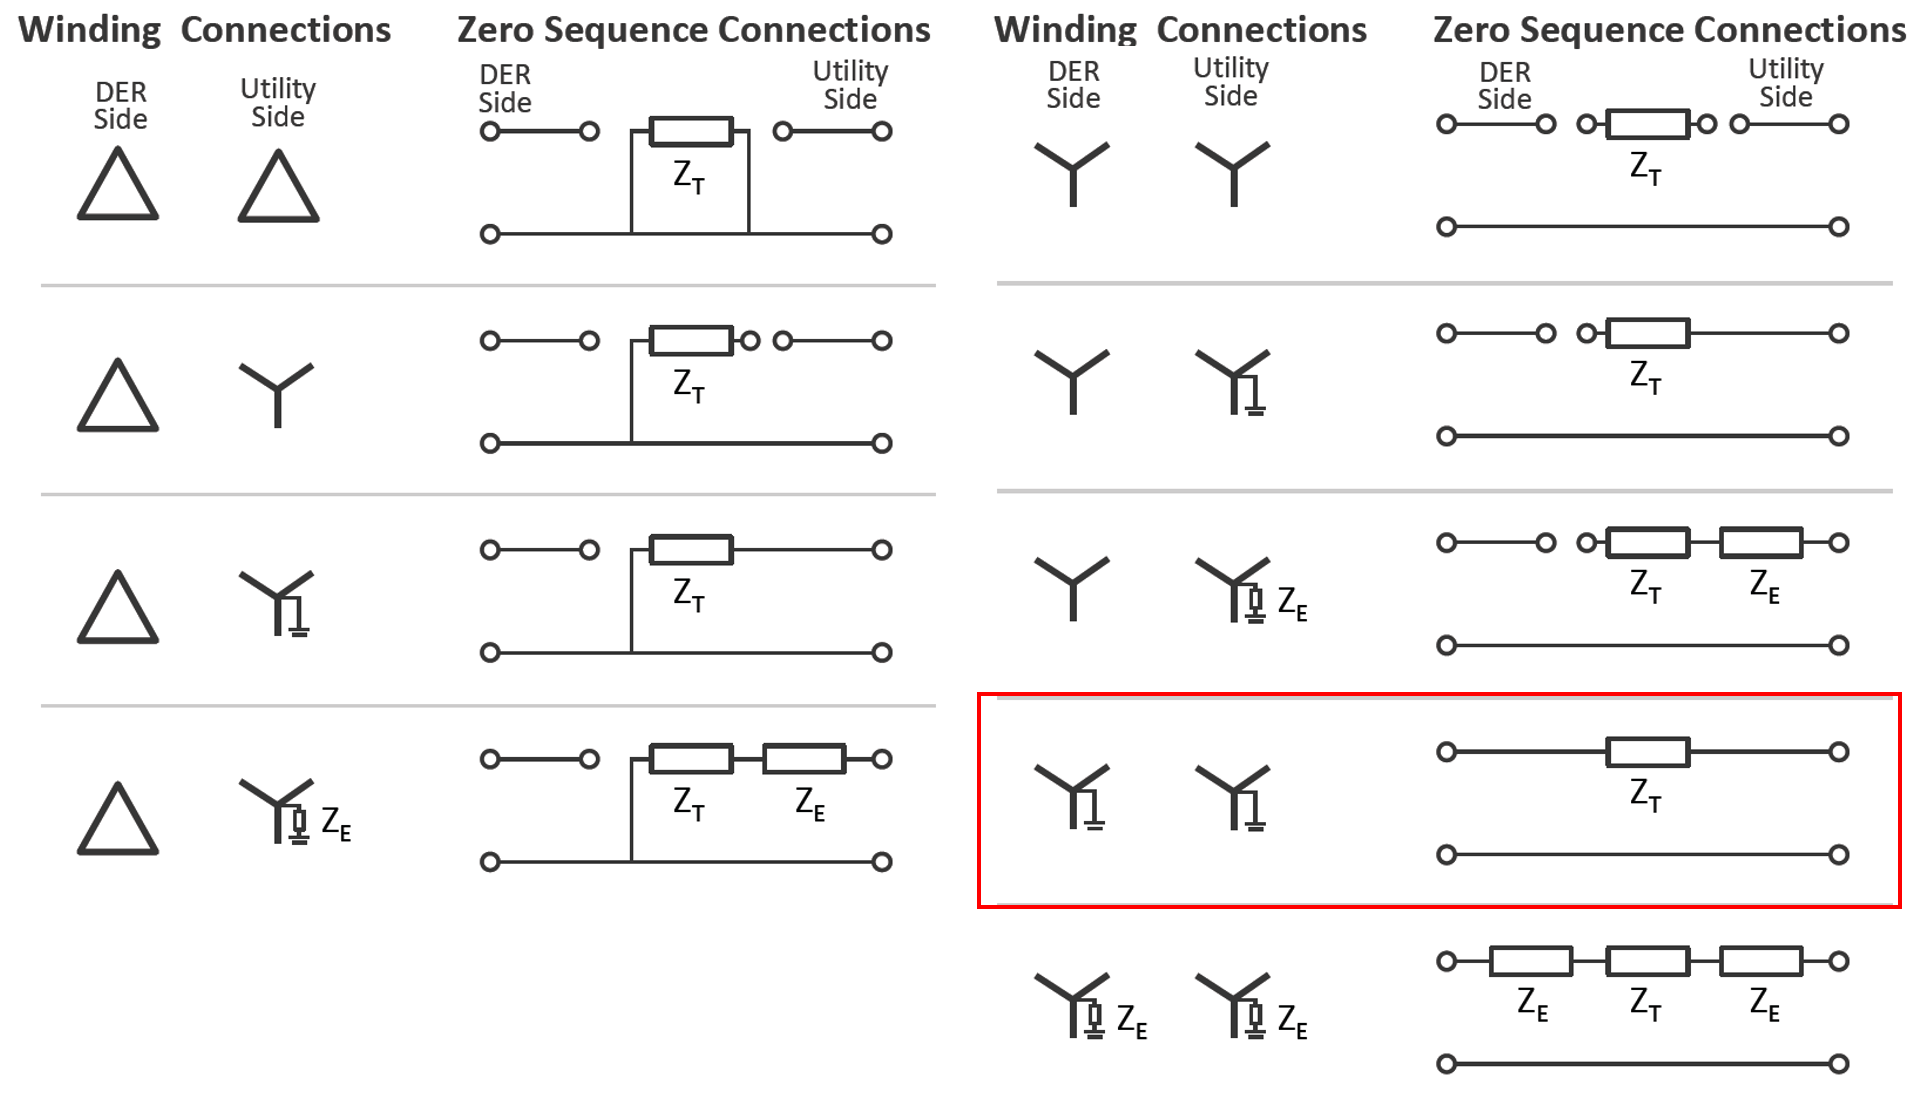

In [85]:
#function to display the transformer config and Zero Sequence based on responses.
def display_Z00_figure(DER_Side, Utility_Side):
    Concat = DER_Side + "_" + Utility_Side
    image_mapping = {
        "Delta_Delta" : "Z00_DD.png",
        "Delta_Y" : "Z00_DY.png",
        "Delta_Yg" : "Z00_DYg.png",
        "Delta_Y (effectively grounded)" : "Z00_DYeg.png",
        "Y_Y" : "Z00_YY.png",
        "Y_Yg" : "Z00_YYg.png",
        "Y_Y (effectively grounded)" : "Z00_YYeg.png",
        "Yg_Yg" : "Z00_YgYg.png",
        "Y (effectively grounded)_Y (effectively grounded)" : "Z00_YegYeg.png"
    }
    
    #retrieve appropriate image
    image_file = image_mapping.get(Concat,"Residential_POC.png")
    display(Image(filename=image_file, width='auto'))

#Execution of flowchart from 1547.2-2023
def calculate_RPA(DER_rating, Facility_annual_average_demand_kw, DER_exportlimit,isZeroSequence,DER_phase):
    if DER_rating.value > 500:
        display(Facility_annual_average_demand_kw)
        print("The DER to local demand ratio is " + str(round(DER_rating.value/Facility_annual_average_demand_kw.value,2)))
        if (DER_rating.value/Facility_annual_average_demand_kw.value) >= .1:
            RPA = "RPA at PCC"
        else:
            display(DER_exportlimit)
            if DER_exportlimit.value == False:
                RPA = "RPA at PCC"
            else:
                if isZeroSequence(SYS_winding.value, DER_winding.value) == True:
                    RPA = "RPA at PoC"
                else:
                    RPA = "Z-Seq. Cont. Broken"
    
    else:
        if DER_phase.value ==  "Single Phase":
            RPA = "Residential, RPA at PoC"
        
        elif isZeroSequence(SYS_winding.value, DER_winding.value) == True:
            RPA = "RPA at PoC"
        else:
            RPA = "Z-Seq. Cont. Broken"

    return RPA
    
RPA = calculate_RPA(DER_rating, Facility_annual_average_demand_kw, DER_exportlimit,isZeroSequence,DER_phase)
#Output
print(DER_rating.value)
print(isZeroSequence(SYS_winding.value,DER_winding.value))
print(DER_phase.value)
print(RPA)
if DER_phase.value or SYS_phase.value == "Three Phase":
    print("The DER side transformer configuration is " + DER_winding.value + " and the Utility side transformer configuration is " + SYS_winding.value)
    display_Z00_figure(DER_winding.value, SYS_winding.value)

<h1> Task 2: Identify applicable level 1 screens</h1>
<ul>
    <li>General, apply to all projects</li>
        <ol><li>Service Territory</li>
            <li>Island Potential / Penetration</li>
            <li>Fault Interrupting Limits</li>
            <li>Fault Interrupting Limits</li>
        </ol>
    <li>Only apply single phase systems in certain configurations</li>
        <ol start = "5"><li>Shared Secondary</li>
            <li>Single Phase Center Tap Neutral</li>
            <li>Single Phase DER, Three Phase Service</li>
        </ol>
    <li>Apply to any DER in certain configurations</li>
        <ol start = "8"><li>Behind Regulation Device</li>
            <li>Export Limited</li>
            <li>LV Network Interconnection</li>
        </ol>
</ul>

<p><i><a href="https://www.epri.com/research/products/000000003002030551">EPRI 3002030551</a> <b>Generic Technical Interconnection and Interoperability Requirements (TIIRs), 2nd Edition</b> (2024)</i></p>

<p><i><a href="https://www.epri.com/research/products/000000003002023483">EPRI 3002023483</a> <b>Storage and Distributed Generation Engineering Guide</b> (2022)</i></p>

In [62]:
# Create checkboxes for general level 1 screens
screen_5 = widgets.Checkbox(value=False, description='Single phase DER is connecting on a shared secondary.', layout={'width':'auto'})
screen_6 = widgets.Checkbox(value=False, description='DER is connecting on one leg of a center-tap neutral (120V).', layout={'width':'auto'})
screen_7 = widgets.Checkbox(value=False, description ='Single phase DER is connecting to three phase service.', layout={'width':'auto'})
screen_8 = widgets.Checkbox(value=False, description = 'DER is downstream of a line voltage regulating device.', layout={'width':'auto'})
screen_9 = widgets.Checkbox(value=False, description='DER will be export limited.', layout={'width':'auto'})
screen_10 = widgets.Checkbox(value=False, description='DER is proposing interconnection on a Low Voltage Network.', layout={'width':'auto'})
# Create a label
Screen_Prompt_General = widgets.Label(value="Check all that apply:")

# Display the widgets
def prompt_screens(Screen_Prompt_General, screen_5, screen_6, screen_7, screen_8, screen_9, screen_10):
    if DER_phase.value == "Single Phase":
        display(Screen_Prompt_General, screen_5, screen_6, screen_7, screen_8, screen_9, screen_10)
    else:
        display(Screen_Prompt_General, screen_8, screen_9, screen_10)

In [45]:
# Define the string values associated with each checkbox
def generate_screens_table(screen_5,screen_6,screen__7,screen_8,screen_9,screen_10):
    data = {
        "Title": [],
        "Description": []
    }
        #Screens 1 - 4 apply to all projects.
        
    #Screen 1
    data["Title"].append("Service Territory")
    data["Description"].append("The proposed DER's PCC must be on a portion of the utility's service territory.")
    
    #Screen 2
    data["Title"].append("Island Potential")
    data["Description"].append("For interconnection of a proposed DER to a radial distribution circuit, the aggregated Export Capacity generation, including the proposed DER on the circuit shall not exceed 15% of the line section annual peak load as most recently measured at the substation, a line section that is a portion of utility's distribution connected to a customer bounded by automatic sectionalizing devicing or the end of the distribution line. For solar, utility may consider 100% of applicable loading (i.e., daytime minimum load for solar), if available instead of 15% of line section peak load.")
    
    #Screen 3
    data["Title"].append("Aggregate Fault Current")
    data["Description"].append("The fault current of the proposed DER, in aggregation with the fault current of other DER on the distribution circuit, shall not contribute more than 10% to the distribution circuit's maximum fault current at the point on the MV (primary) level nearest the proposed point of interconnection.")
    
    #Screen 4
    data["Title"].append("Fault Interrupting Limits")
    data["Description"].append("The fault current of the proposed DER, in aggregate with fault current of other DER on the distribution circuit, shall not cause any distribution protective devices and equipment (including, but not limited to substation breakers, fuse cutouts, and line reclosers), or customer interconnection equipment on the system, to exceed 87.5% of the short circuit interrupting capability.")
    
    if screen_5.value:
        data["Title"].append("Shared Secondary")
        data["Description"].append("If the proposed DER is to be interconnected on a single-phase shared transformer secondary, the aggregate generation capacity on the shared secondary, including the proposed DER, shall not exceed 20 kW or 65% of the transformer nameplate rating.")
        
    if screen_6.value:
        data["Title"].append("Connected Line to Neutral")
        data["Description"].append("If the proposed DER is single-phase and is to be interconnected on a center tap neutral of a 240-volt service, its addition shall not create an imbalance between the two sides of the 240-volt service of more than 20% of the nameplate rating of the service transformer.")
        
    if screen_7.value:
        data["Title"].append("1P DER / 3P Service")
        data["Description"].append("If the proposed DER is single-phase and is to be interconnected to a three-phase service, its Nameplate Rating shall not exceed 10% of the service transformer or 50kW, whichever is smaller.")
        
    if screen_8.value:
        data["Title"].append("Behind Regulation Device")
        data["Description"].append("If the DER’s PCC is to be interconnected behind a line voltage regulator, the DER’s Nameplate Rating shall be less than 500 kW. (This does not include substation voltage regulation)")
        
    if screen_9.value:
        data["Title"].append("Export Limited")
        data["Description"].append("Export limiting DER require this Inadvertent Export test if the Nameplate Rating minus the Export Capacity is greater than 250 kW. With a power change equal to the Nameplate Rating minus the Export Capacity, the change in voltage at the point on the medium voltage (primary) level nearest the PCC does not exceed 3%. ")
        
    if screen_10.value:
        data["Title"].append("LV Network")
        data["Description"].append(" For interconnection of a proposed DER to the load side of spot network protectors, the proposed DER must utilize an inverter-based equipment package and the proposed DER’s export capacity, together with the aggregated Nameplate Rating of other inverter-based generation, shall not exceed the smaller of 5% of a spot network's maximum load or 50 kW.")
        
    # Create a DataFrame
    screens_df = pd.DataFrame(data)
    
    # Display the table
    display(screens_df)

<h1>Task 3: Print Recommended Commissioning and Verification Tests</h1>

<p><i><a href="https://www.epri.com/research/products/000000003002019420">EPRI 3002019420</a> <b>DER Plant-Level Performance Verification and Commissioning Guideline</b> (2020)</i></p>

<p><i><a href="https://www.epri.com/research/products/000000003002028376">EPRI 300208376</a> <b>DER Performance Verification and Commissioning Guideline, Utility Current Practices and EPRI Recommendations</b> (2023)</i></p>

<p><i><a href="https://standards.ieee.org/ieee/1547.1/6039/">IEEE 1547.1-2020</a> <b>IEEE Standard Conformance Test Procedures for Equipment Interconnecting Distributed Energy Resources with Electric Power Systems and Associated Interfaces</b></i></p>

In [50]:
def generate_commissioning_table(input_param):
    # Define the table data
    data = {
        "Commissioning Tests": [
            "As-built installation matches with approved design",
            "Protection relay / DTT test",
            "SCADA/Metering test",
            "Permit service signal test",
            "Enter service ramp test",
            "Current harmonics test",
            "Active power export limit test",
            "Grid support functions test",
            "Unintentional island detection test",
            "Load rejection overvoltage",
            "Open phase detection and open phase overvoltage test",
            "Ground fault overvoltage",
            "Rapid voltage change",
            "Flicker"
        ],
        "Purpose": [
            "Confirm design, confirm certification record compliance with interconnection requirement",
            "Confirm design, Confirm settings, Avoid risks of islanding and other protection issue",
            "Confirm communication and measurement",
            "Confirm communication and timing of plant shutdown after receiving disconnect command",
            "Confirm operation, timing and check ramp rate.",
            "Check for site-specific harmonic interactions that might impacting power quality",
            "Validate performance of export limit controls.",
            "Confirm operation, check and document settings",
            "Routine check for loss of grid, depending on plant size confirm islanding detection is active",
            "Document plant response with rapid disconnect, and overvoltage magnitude/duration",
            "Confirm required detection response and document voltage on the open phase with and without the plant running.",
            "Confirm DER plant will not cause overvoltage due to neutral shifting under unintentional island condition. Recommend to confirm through analysis, field testing not practical.",
            "Confirm plant impact on medium voltage short term change is <3%.",
            "Confirm plant output variations do not create visible fluctuations"
        ],
        "RPA at PCC": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        "RPA at PoC": [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        "Residential, RPA at PoC": [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0],
        "Z-Seq. Cont. Broken": [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
    }
    
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    # Select the relevant columns based on the input parameter
    if input_param not in df.columns:
        raise ValueError("Invalid input parameter. Choose from 'RPA at PCC', 'RPA at PoC', 'Residential, RPA at PoC', 'Z-Seq. Cont. Broken'.")
    
    # Map the integer values to the corresponding strings
    mapping = {1: "Recommended", 0: "May Waive", -1: "Not Applicable"}
    df[input_param] = df[input_param].map(mapping)

        # Adjust display settings to prevent text from being cut off
    pd.set_option('display.max_colwidth', None)
    
    # Display the table with the selected column
    display(df[["Commissioning Tests", "Purpose", input_param]])

# Example usage
generate_commissioning_table(RPA)
print(RPA)

,Commissioning Tests,Purpose,RPA at PCC
0,As-built installation matches with approved design,"Confirm design, confirm certification record compliance with interconnection requirement",Recommended
1,Protection relay / DTT test,"Confirm design, Confirm settings, Avoid risks of islanding and other protection issue",Recommended
2,SCADA/Metering test,Confirm communication and measurement,Recommended
3,Permit service signal test,Confirm communication and timing of plant shutdown after receiving disconnect command,Recommended
4,Enter service ramp test,"Confirm operation, timing and check ramp rate.",Recommended
5,Current harmonics test,Check for site-specific harmonic interactions that might impacting power quality,Recommended
6,Active power export limit test,Validate performance of export limit controls.,Recommended
7,Grid support functions test,"Confirm operation, check and document settings",Recommended
8,Unintentional island detection test,"Routine check for loss of grid, depending on plant size confirm islanding detection is active",Recommended
9,Load rejection overvoltage,"Document plant response with rapid disconnect, and overvoltage magnitude/duration",Recommended


RPA at PCC


In [86]:
# Create an output widget
output = widgets.Output()

# Define the event handler function
def on_value_change(change):
    with output:
        clear_output(wait=True)
        if DER_phase.value == 'Three Phase':
            DER_winding.disabled = False
        else:
            DER_winding.disabled = True
        RPA = calculate_RPA(DER_rating, Facility_annual_average_demand_kw, DER_exportlimit,isZeroSequence,DER_phase)
        display_Z00_figure(DER_winding.value, SYS_winding.value)
        print(RPA)
        print(f'DER_winding: {DER_winding.value}')
        print(f'SYS_winding: {SYS_winding.value}')
        prompt_screens(Screen_Prompt_General, screen_5, screen_6, screen_7, screen_8, screen_9, screen_10)
        generate_screens_table(screen_5,screen_6,screen_7,screen_8,screen_9,screen_10)
        generate_commissioning_table(RPA)

# Link the widgets to the event handler
DER_rating.observe(on_value_change, names='value')
DER_phase.observe(on_value_change, names='value')
DER_winding.observe(on_value_change, names='value')
SYS_phase.observe(on_value_change, names='value')
SYS_winding.observe(on_value_change, names='value')
Facility_annual_average_demand_kw.observe(on_value_change, names='value')
DER_exportlimit.observe(on_value_change, names='value')
screen_5.observe(on_value_change, names='value')
screen_6.observe(on_value_change, names='value')
screen_7.observe(on_value_change, names='value')
screen_8.observe(on_value_change, names='value')
screen_9.observe(on_value_change, names='value')
screen_10.observe(on_value_change, names='value')

# Display the widgets and output
display(DER_rating, DER_phase, DER_winding, SYS_phase, SYS_winding, output)

BoundedFloatText(value=505.0, description='DER Rating (kW):', max=10000.0, step=1.0, style=DescriptionStyle(de…

RadioButtons(description='Select DER Phasing:', index=1, options=('Single Phase', 'Three Phase'), value='Three…

RadioButtons(description='Select DER Transformer Configuration:', index=2, options=('Delta', 'Y', 'Yg', 'Y (ef…

RadioButtons(description='Select Electric Service PCC Phasing:', options=('Single Phase', 'Three Phase'), valu…

RadioButtons(description='Select Utility Side Transformer Configuration:', index=2, options=('Delta', 'Y', 'Yg…

Output()

In [99]:
# Create an output widget
output = widgets.Output()

# Define the event handler function
def on_value_change(change):
    with output:
        clear_output(wait=True)
        if DER_phase.value == 'Three Phase':
            DER_winding.disabled = False
        else:
            DER_winding.disabled = True
        if SYS_phase.value == 'Single Phase':
            DER_phase.value == 'Single Phase'
            DER_phase.disabled = True
        RPA = calculate_RPA(DER_rating, Facility_annual_average_demand_kw, DER_exportlimit, isZeroSequence, DER_phase)
        display_Z00_figure(DER_winding.value, SYS_winding.value)
        print(RPA)
        print(f'DER_winding: {DER_winding.value}')
        print(f'SYS_winding: {SYS_winding.value}')
        prompt_screens(Screen_Prompt_General, screen_5, screen_6, screen_7, screen_8, screen_9, screen_10)
        generate_screens_table(screen_5, screen_6, screen_7, screen_8, screen_9, screen_10)
        generate_commissioning_table(RPA)

# Link the widgets to the event handler 1
DER_rating.observe(on_value_change, names='value')
DER_phase.observe(on_value_change, names='value')
DER_winding.observe(on_value_change, names='value')
SYS_phase.observe(on_value_change, names='value')
SYS_winding.observe(on_value_change, names='value')
Facility_annual_average_demand_kw.observe(on_value_change, names='value')
DER_exportlimit.observe(on_value_change, names='value')
screen_5.observe(on_screen_value_change, names='value')
screen_6.observe(on_screen_value_change, names='value')
screen_7.observe(on_screen_value_change, names='value')
screen_8.observe(on_screen_value_change, names='value')
screen_9.observe(on_screen_value_change, names='value')
screen_10.observe(on_screen_value_change, names='value')

#create layout
#row 0 = display(DER_rating)
row_1 = widgets.HBox([DER_phase, DER_winding, SYS_phase, SYS_winding])
#left_column = widgets.VBox([DER_exportlimit])
#right_column = widgets.VBox([output])

# Combine into a two-column layout
#two_column_layout = widgets.HBox([left_column, right_column])

# Display the layout
display(DER_rating, row_1)
display(output)

BoundedFloatText(value=100.0, description='DER Rating (kW):', max=10000.0, step=1.0, style=DescriptionStyle(de…

Output()